In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln
from scipy.stats import norm
from scipy.optimize import minimize

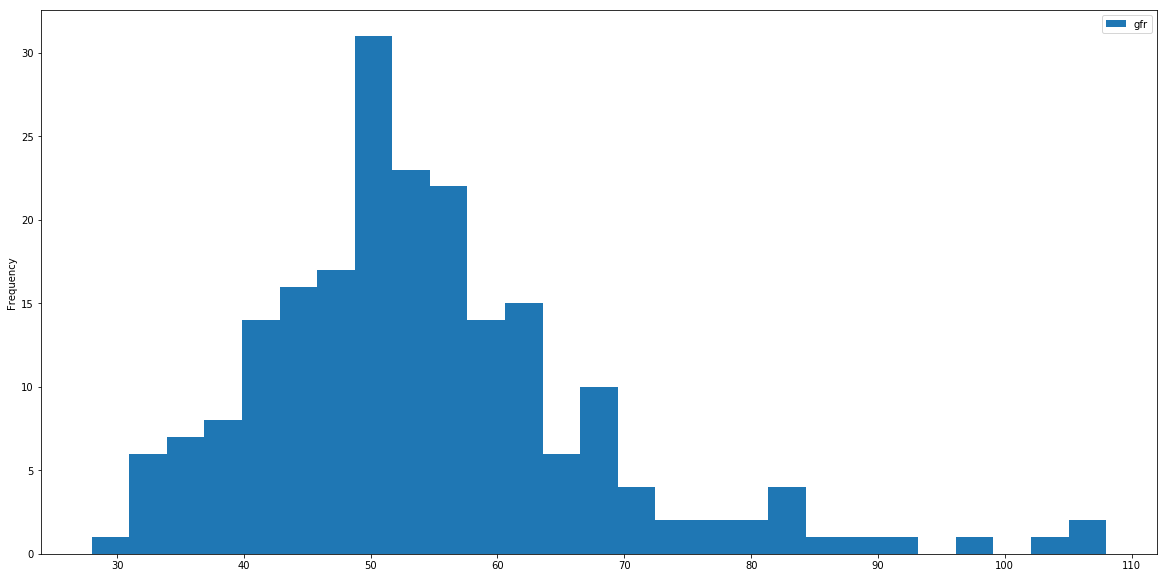

In [33]:
gfr_data = pd.read_csv('gfr.csv')
gfr_data.plot(kind='hist', figsize=(20,10), bins=27)

In [34]:
def neg_shifted_gamma_log_likelihood(x, lamb, sigma, nu):
    
    log_lik = np.sum((nu - 1) * np.log(x - lamb) - (nu*np.log(sigma) + gammaln(nu)) - ((x - lamb) / sigma))
    
    return -log_lik

In [35]:
neg_shifted_gamma_log_lik_for_x = lambda theta: neg_shifted_gamma_log_likelihood(gfr_data['gfr'], theta[0], theta[1], theta[2])

In [41]:
minimize(neg_shifted_gamma_log_lik_for_x, (25.00000047,  6.88395015,  3.76222955), method='L-BFGS-B')

      fun: 834.4629070893228
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.41060513e-05, 4.20641300e-04, 1.93267624e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 18
   status: 0
  success: True
        x: array([21.11176547,  5.38332254,  6.15859196])

In [42]:
theta = minimize(neg_shifted_gamma_log_lik_for_x, (20,1,1), method='L-BFGS-B')['x']
theta

array([21.11085438,  5.38305501,  6.15907382])

In [43]:
def gamma_pdf(x, lamb, sigma, nu):
    
    density = np.exp((nu - 1) * np.log(x - lamb) - (nu*np.log(sigma) + gammaln(nu)) - ((x - lamb) / sigma))
    
    return density

In [44]:
pdf_df = pd.DataFrame({'gfr': np.linspace(22, 110,50),
                       'gamma_density': gamma_pdf(np.linspace(22,110,50), theta[0], theta[1], theta[2]),
                       'normal_density': norm.pdf(np.linspace(22,110,50), loc=gfr_data['gfr'].mean(), scale=gfr_data['gfr'].std())})
pdf_df

,gfr,gamma_density,normal_density
0,22.000000,9.215466e-08,0.001831
1,23.795918,1.976457e-05,0.002470
2,25.591837,1.988246e-04,0.003275
3,27.387755,8.104438e-04,0.004269
4,29.183673,2.126254e-03,0.005469
5,30.979592,4.293216e-03,0.006888
6,32.775510,7.286074e-03,0.008528
7,34.571429,1.092581e-02,0.010379
8,36.367347,1.493380e-02,0.012418
9,38.163265,1.899427e-02,0.014604


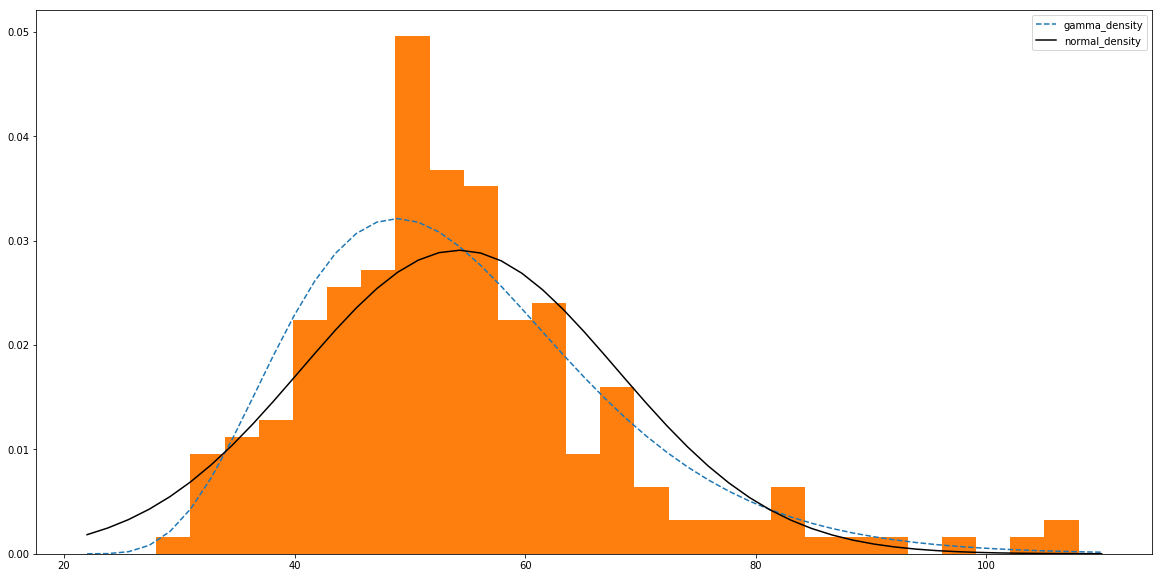

In [45]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(pdf_df['gfr'], pdf_df['gamma_density'], '--')
ax.plot(pdf_df['gfr'], pdf_df['normal_density'], '-k')
myHist = plt.hist(gfr_data['gfr'], 27, normed=True)
ax.legend()